In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('Marketcap.db')
cursor = conn.cursor()

In [5]:
query = '''
SELECT "Industry", "Stock Number", "Market Cap($M)",
"Revenue($M)", "Profits($M)", "Dividend Yield(%)",
"PE Ratio", "Profit Margin(%)", "Day Change(%)", "Year Change(%)",
"Sector"
FROM Industries 
ORDER BY "Industry" ASC'''


# Load the query results into a DataFrame
df = pd.read_sql_query(query, conn)

In [6]:
df.head()

,Industry,Stock Number,Market Cap($M),Revenue($M),Profits($M),Dividend Yield(%),PE Ratio,Profit Margin(%),Day Change(%),Year Change(%),Sector
0,Advertising Agencies,37,58070.0,63690.0,2090.00,2.12,27.74,3.29,1.00,22.94,Communication Services
1,Aerospace & Defense,76,1197210.0,506930.0,21970.00,2.21,54.48,4.33,1.24,55.45,Industrials
2,Agricultural Inputs,16,107980.0,79670.0,4330.00,3.75,24.96,5.43,0.57,-0.23,Materials
3,Airlines,20,127570.0,271610.0,7950.00,2.50,16.05,2.93,0.88,27.33,Industrials
4,Airports & Air Services,9,29590.0,6790.0,923.19,4.88,32.05,13.60,0.02,17.49,Industrials


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Industry           145 non-null    object 
 1   Stock Number       145 non-null    int64  
 2   Market Cap($M)     145 non-null    float64
 3   Revenue($M)        145 non-null    float64
 4   Profits($M)        145 non-null    float64
 5   Dividend Yield(%)  144 non-null    float64
 6   PE Ratio           129 non-null    float64
 7   Profit Margin(%)   145 non-null    float64
 8   Day Change(%)      145 non-null    object 
 9   Year Change(%)     145 non-null    object 
 10  Sector             145 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 12.6+ KB


In [32]:
df['Year Change(%)'] = pd.to_numeric(df['Day Change(%)'])

In [23]:
df.drop('PE Ratio', axis=1, inplace=True)

In [24]:
df.dropna(inplace=True)

In [33]:
df.describe()

,Stock Number,Market Cap($M),Revenue($M),Profits($M),Dividend Yield(%),Profit Margin(%),Day Change(%),Year Change(%)
count,144.000000,1.440000e+02,1.440000e+02,144.000000,144.000000,144.000000,144.000000,144.000000
mean,36.812500,5.079806e+05,1.978725e+05,17477.581806,1.727014,7.498333,0.970278,0.970278
std,66.317837,9.235098e+05,2.816763e+05,32904.559164,1.593112,9.190182,0.897939,0.897939
min,3.000000,2.450000e+03,7.396800e+02,-34550.000000,0.030000,-32.690000,-4.200000,-4.200000
25%,14.000000,5.888750e+04,3.038500e+04,1255.000000,0.655000,2.432500,0.457500,0.457500
50%,20.000000,1.874650e+05,9.264000e+04,5460.000000,1.230000,6.625000,0.885000,0.885000
75%,42.000000,5.312650e+05,2.422775e+05,17372.500000,2.235000,11.785000,1.312500,1.312500
max,664.000000,6.588040e+06,1.804630e+06,204910.000000,11.480000,34.800000,4.020000,4.020000


In [26]:
# Industries with most companies
sorted = df.sort_values(by='Stock Number', ascending=False)
sorted.head(10)

,Industry,Stock Number,Market Cap($M),Revenue($M),Profits($M),Dividend Yield(%),Profit Margin(%),Day Change(%),Year Change(%),Sector
17,Biotechnology,664,1460820.0,127650.0,-34550.00,0.03,-27.07,1.86,51.50,Healthcare
13,Banks - Regional,351,1554640.0,491560.0,109280.00,2.46,22.23,1.48,40.33,Financials
121,Software - Application,241,2570810.0,345140.0,27800.00,0.21,8.05,1.60,51.11,Technology
122,Software - Infrastructure,153,4897250.0,505470.0,112810.00,0.22,22.32,-0.01,33.27,Technology
77,Medical Devices,144,881350.0,201220.0,9250.00,0.29,4.60,0.76,26.99,Healthcare
8,Asset Management,108,1192680.0,342920.0,57440.00,5.55,16.75,1.50,47.14,Financials
37,Drug Manufacturers - Specialty & Generic,83,319790.0,132590.0,-995.04,0.43,-0.75,0.38,19.93,Healthcare
84,Oil & Gas Exploration & Production,82,726980.0,288040.0,56510.00,2.25,19.62,1.00,1.55,Energy
1,Aerospace & Defense,76,1197210.0,506930.0,21970.00,2.21,4.33,1.24,55.45,Industrials
126,Specialty Industrial Machinery,74,835230.0,250240.0,26020.00,0.99,10.40,1.31,35.61,Industrials


In [34]:
corr_matrix = df.corr(numeric_only=True)

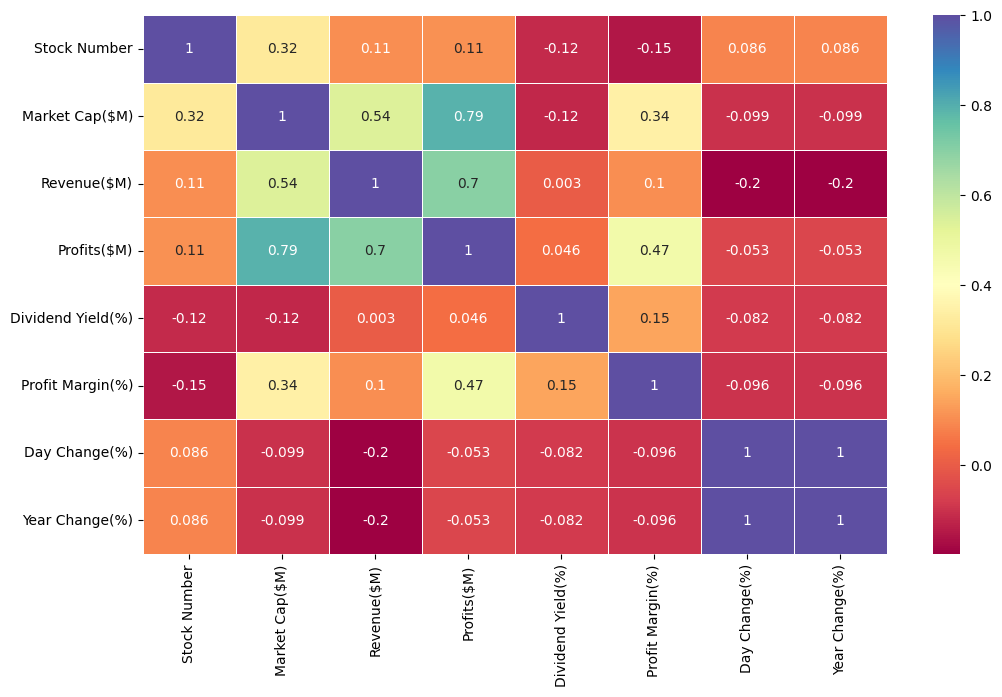

In [35]:
# Correlation heatmap
plt.figure(figsize = (12, 7))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='Spectral')
plt.show()

- Market cap has a fairly strong correlation with Revenue and a strong correlation with Profits
- The higher the market cap the more the profits
- Revenue also has a strong correlation with Profits
- Conclusively the amount of profits are strongly determined by the market cap and the revenue of the industry
- Also the market cap plays a somewhat significant role in the profit margins as is the profit value itself
- The strongest negative correlation is between PE ratio and Profit margin
- Industries with strongly fluctuating changes are likely to have less revenue, profits and dividends

In [29]:
corr_matrix['Profits($M)'].sort_values(ascending=False)

Profits($M)          1.000000
Market Cap($M)       0.789948
Revenue($M)          0.698846
Profit Margin(%)     0.465245
Stock Number         0.106935
Dividend Yield(%)    0.045712
Name: Profits($M), dtype: float64

**The largest industries have the most profits**

In [30]:
# Industries with highest profit margins
sorted = df.sort_values(by='Profit Margin(%)', ascending=False)
sorted.head(10)

,Industry,Stock Number,Market Cap($M),Revenue($M),Profits($M),Dividend Yield(%),Profit Margin(%),Day Change(%),Year Change(%),Sector
97,REIT - Diversified,15,65990.0,9670.0,3360.0,5.64,34.80,0.70,18.14,Real Estate
104,REIT - Retail,28,209950.0,24650.0,6430.0,4.92,26.07,0.77,36.61,Real Estate
48,Financial Data & Stock Exchanges,14,633450.0,63190.0,15750.0,0.91,24.92,1.15,39.89,Financials
69,Internet Content & Information,66,3820170.0,571110.0,141150.0,0.46,24.72,0.95,46.71,Communication Services
32,Credit Services,52,1477840.0,247990.0,61270.0,1.38,24.71,1.10,35.02,Financials
12,Banks - Diversified,20,2511890.0,855470.0,204910.0,3.53,23.95,3.23,42.27,Financials
118,Semiconductors,66,6588040.0,499250.0,117190.0,0.88,23.47,0.55,136.93,Technology
122,Software - Infrastructure,153,4897250.0,505470.0,112810.0,0.22,22.32,-0.01,33.27,Technology
13,Banks - Regional,351,1554640.0,491560.0,109280.0,2.46,22.23,1.48,40.33,Financials
100,REIT - Industrial,17,293700.0,30420.0,6760.0,3.62,22.23,0.77,16.83,Real Estate


In [42]:
# Most adividend yields
sorted = df.sort_values(by='Dividend Yield(%)', ascending=False)
sorted.head(10)

,Industry,Stock Number,Market Cap($M),Revenue($M),Profits($M),Dividend Yield(%),Profit Margin(%),Day Change(%),Year Change(%),Sector
101,REIT - Mortgage,39,57520.0,8320.0,542.20,11.48,6.52,-0.38,-0.38,Real Estate
94,Pharmaceutical Retailers,7,9350.0,147480.0,-5830.00,5.70,-3.95,2.17,2.17,Healthcare
97,REIT - Diversified,15,65990.0,9670.0,3360.00,5.64,34.80,0.70,0.70,Real Estate
86,Oil & Gas Midstream,52,706540.0,445420.0,46940.00,5.63,10.54,1.06,1.06,Energy
8,Asset Management,108,1192680.0,342920.0,57440.00,5.55,16.75,1.50,1.50,Financials
133,Tobacco,10,353530.0,93530.0,1470.00,5.14,1.57,0.24,0.24,Consumer Staples
104,REIT - Retail,28,209950.0,24650.0,6430.00,4.92,26.07,0.77,0.77,Real Estate
4,Airports & Air Services,9,29590.0,6790.0,923.19,4.88,13.60,0.02,0.02,Industrials
98,REIT - Healthcare Facilities,17,159650.0,22380.0,-1260.00,4.80,-5.61,1.02,1.02,Real Estate
85,Oil & Gas Integrated,20,1743860.0,1804630.0,158580.00,4.58,8.79,0.29,0.29,Energy


In [ ]:
# Group by sector
sectors = df.groupby('Sector')[['Dividend Yield(%)', 'Profit Margin(%)']].mean().reset_index()

C:\Users\user\AppData\Local\Temp\ipykernel_11824\2383891086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sectors, x='Sector', y='Dividend Yield(%)', palette='viridis')


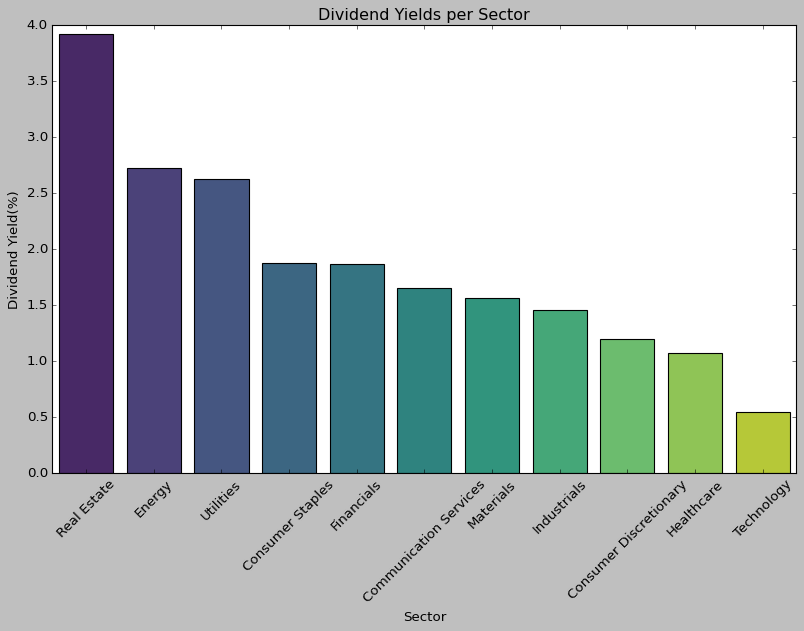

In [64]:
# Sectors with most dividend yields
sectors.sort_values(by='Dividend Yield(%)', ascending=False, inplace=True)

# Plotting bar chart
plt.figure(figsize=(12, 7))
sns.barplot(data=sectors, x='Sector', y='Dividend Yield(%)', palette='viridis')
plt.title('Dividend Yields per Sector')
plt.xlabel('Sector')
plt.ylabel('Dividend Yield(%)')
plt.xticks(rotation=45)
plt.show()

In [52]:
plt.savefig('sector_yields.png') # Saving the chart

<Figure size 640x480 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_11824\3956872872.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sectors, x='Sector', y='Profit Margin(%)', palette='viridis')


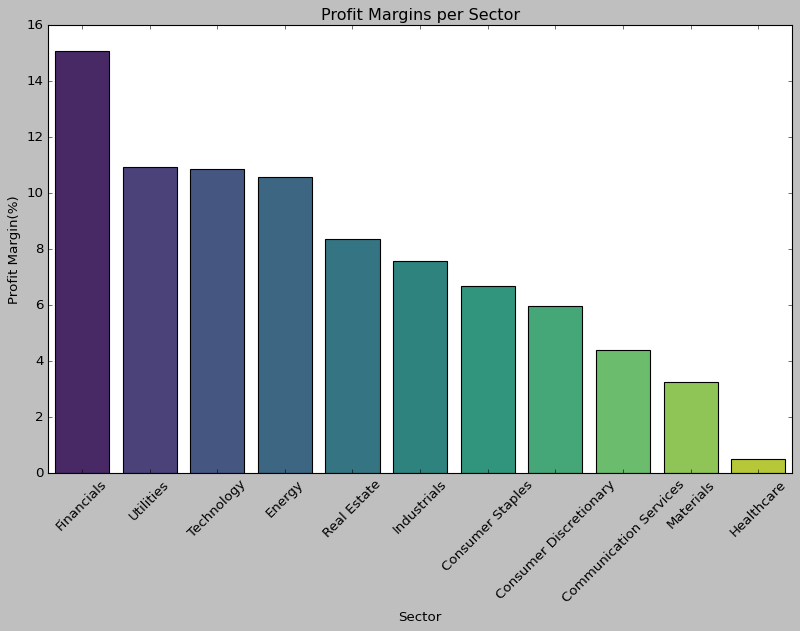

In [65]:
# Sectors with highesy profit margins
sectors.sort_values(by='Profit Margin(%)', ascending=False, inplace=True)

# Plotting bar chart 2
plt.figure(figsize=(12, 7))
sns.barplot(data=sectors, x='Sector', y='Profit Margin(%)', palette='viridis')
plt.title('Profit Margins per Sector')
plt.xlabel('Sector')
plt.ylabel('Profit Margin(%)')
plt.xticks(rotation=45)
plt.show()


In [66]:
plt.savefig('sector_profit margins.png') # Saving the chart

<Figure size 640x480 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_11824\970150565.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted, x='Industry', y='Revenue($M)', palette='viridis')


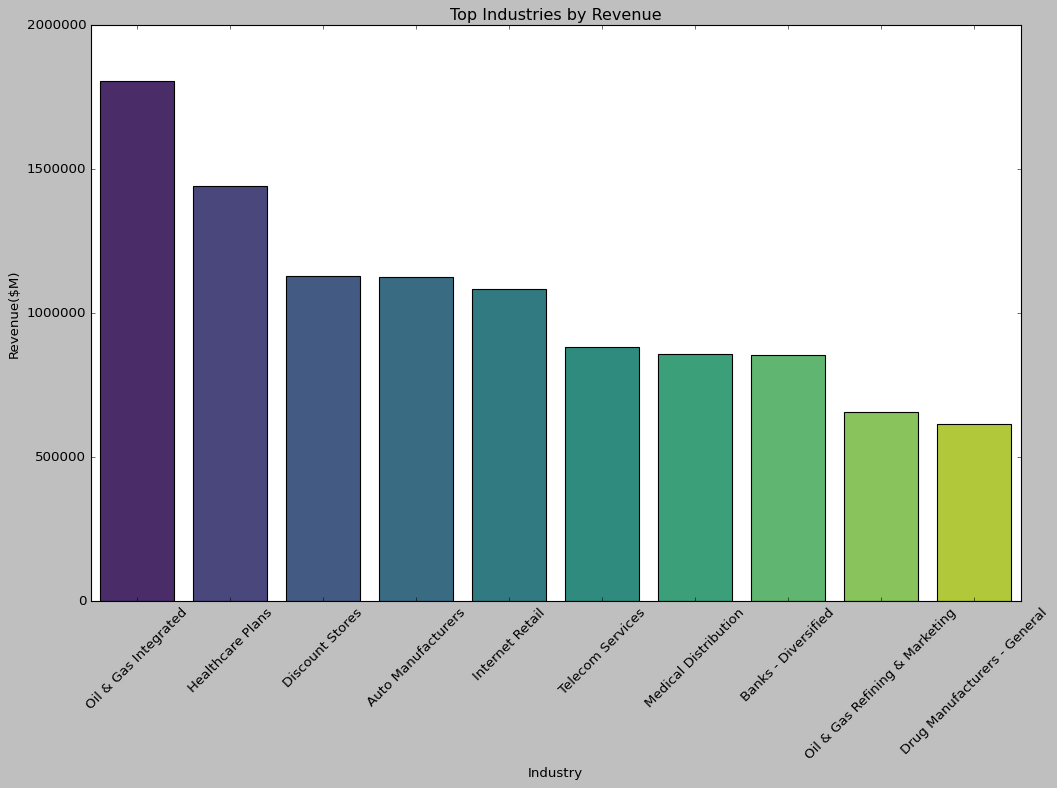

In [94]:
# Industries with most dividend yields
sorted = df.sort_values(by='Revenue($M)', ascending=False)
sorted = sorted[:10]

plt.figure(figsize=(15, 9))
sns.barplot(data=sorted, x='Industry', y='Revenue($M)', palette='viridis')
plt.title('Top Industries by Revenue')
plt.xlabel('Industry')
plt.ylabel('Revenue($M)')
plt.xticks(rotation=45)
plt.show()

In [95]:
plt.savefig('Industry_Revenue.png')

<Figure size 640x480 with 0 Axes>

C:\Users\user\AppData\Local\Temp\ipykernel_11824\722329724.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted, x='Industry', y='Profits($M)', palette='rainbow')


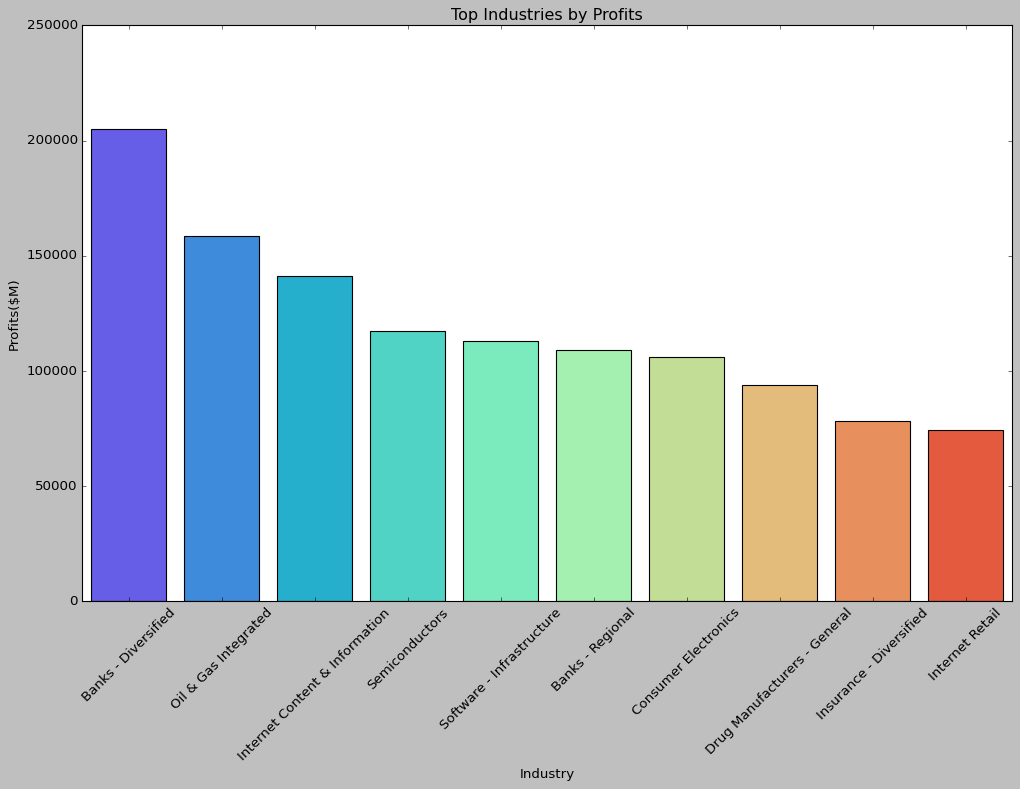

In [90]:
# Industries with most profits
sorted = df.sort_values(by='Profits($M)', ascending=False)
sorted = sorted[:10]

plt.figure(figsize=(15, 9))
sns.barplot(data=sorted, x='Industry', y='Profits($M)', palette='rainbow')
plt.title('Top Industries by Profits')
plt.xlabel('Industry')
plt.ylabel('Profits($M)')
plt.xticks(rotation=45)
plt.show()

In [93]:
plt.savefig('Industry_Profits.png')

<Figure size 640x480 with 0 Axes>